In [1]:
import os
import itertools
import sys
import cv2
import numpy as np
import pandas as pd
import scipy
import skimage
from skimage import data, filters
import matplotlib
from matplotlib import pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
xls = pd.read_excel('../data/2012-2017_labels.xlsx', sheetname='2016')

In [3]:
xls.shape

(216, 1571)

In [4]:
serum_cols = xls.columns.str.contains('SPEP')

In [12]:
cols = xls.columns[serum_cols]
spreadsheet_top = xls.ix[:30, cols]
spreadsheet_top.shape

(30, 539)

### Attempt to OCR gel dates

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import datasets

from skimage import data, filters

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils.np_utils import to_categorical

from matplotlib import pyplot as plt

Using TensorFlow backend.


In [1]:
def extract_images_from_pdf(filename):
    # https://nedbatchelder.com/blog/200712/extracting_jpgs_from_pdfs.html
    pdf = open(filename, "rb").read()

    startmark = "\xff\xd8"
    startfix = 0
    endmark = "\xff\xd9"
    endfix = 2
    i = 0

    njpg = 0
    while True:
        istream = pdf.find("stream", i)
        if istream < 0:
            break
        istart = pdf.find(startmark, istream, istream + 20)
        if istart < 0:
            i = istream + 20
            continue
        iend = pdf.find("endstream", istart)
        if iend < 0:
            raise Exception("Didn't find end of stream!")
        iend = pdf.find(endmark, iend - 20)
        if iend < 0:
            raise Exception("Didn't find end of JPG!")

        istart += startfix
        iend += endfix
        print("JPG %d from %d to %d" % (njpg, istart, iend))

        jpg = pdf[istart:iend]
        jpgfile = open("./april_2016_gels/jpg%d.jpg" % njpg, "wb")
        jpgfile.write(jpg)
        jpgfile.close()

        njpg += 1
        i = iend
        
extract_images_from_pdf('../data/GelsApr2016.pdf')

JPG 0 from 18287 to 342953
JPG 1 from 343210 to 661544
JPG 2 from 661946 to 918306
JPG 3 from 919763 to 1182200
JPG 4 from 1182465 to 1415006
JPG 5 from 1415271 to 1717770
JPG 6 from 1718337 to 2565228
JPG 7 from 2565494 to 3390389
JPG 8 from 3390647 to 4070934
JPG 9 from 4071200 to 4989581
JPG 10 from 4989846 to 5545004
JPG 11 from 5545270 to 6301888
JPG 12 from 6302153 to 7097204
JPG 13 from 7097486 to 7897884
JPG 14 from 7898142 to 8818653
JPG 15 from 8818919 to 9470832
JPG 16 from 9471097 to 9851333
JPG 17 from 9851599 to 10199113
JPG 18 from 10199380 to 10516109
JPG 19 from 10516376 to 10789240
JPG 20 from 10789750 to 11142500
JPG 21 from 11142767 to 11386450
JPG 22 from 11386734 to 11776822
JPG 23 from 11777089 to 12173207
JPG 24 from 12173474 to 12559248
JPG 25 from 12559515 to 13140375
JPG 26 from 13140642 to 13483318
JPG 27 from 13483577 to 13787207
JPG 28 from 13787475 to 14411664
JPG 29 from 14411932 to 15032712
JPG 30 from 15032996 to 15416365
JPG 31 from 15416625 to 163505

In [11]:
img = data.imread('./april_2016_gels/jpg3.jpg', 0)
plt.imshow(img)

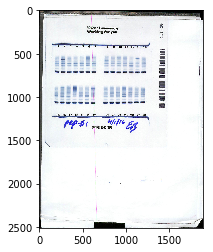

In [12]:
plt.show()

In [28]:
from keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()

model = Sequential()
model.add(Dense(32, input_shape=img.shape))
model.add(Dense(64))

model.compile()
model.train

<module 'keras.datasets.mnist' from '/Users/ianjohnson/.virtualenvs/tensorflow2/lib/python2.7/site-packages/keras/datasets/mnist.pyc'>


TypeError: compile() takes at least 3 arguments (1 given)